# Week 02 - Data Handling with pandas (CSV, Grouping, QC)

**Goal:** Learn to load, explore, and summarize biological datasets using pandas, with an emphasis on phenotypic screening-style data and decision-oriented analysis.

**skills practiced:**
- loading CSV files with pandas
- working with DataFrames (rows, columns, indexing)
- filtering and grouping data
- summarizing data with mean and variability
- basic data visualization (matplotlib)
- translating data patterns into biological conclusions

## Day 1 - Loading and Exploring BIological Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd 

df=pd.read_csv("data/example_screen.csv")
df

,compound,dose,phenotype_score,batch
0,DMSO,0,0.05,1
1,DMSO,0,-0.02,1
2,Cmpd_A,1,0.85,1
3,Cmpd_A,1,0.92,1
4,Cmpd_B,1,0.30,1
5,Cmpd_B,1,0.28,1
6,Cmpd_A,1,0.88,2
7,Cmpd_B,1,0.25,2


In [3]:
df.head()

,compound,dose,phenotype_score,batch
0,DMSO,0,0.05,1
1,DMSO,0,-0.02,1
2,Cmpd_A,1,0.85,1
3,Cmpd_A,1,0.92,1
4,Cmpd_B,1,0.30,1


In [5]:
df.shape

(8, 4)

In [6]:
df.dtypes

compound            object
dose                 int64
phenotype_score    float64
batch                int64
dtype: object

In [7]:
df.columns

Index(['compound', 'dose', 'phenotype_score', 'batch'], dtype='object')

In [8]:
df.dtypes

compound            object
dose                 int64
phenotype_score    float64
batch                int64
dtype: object

In [9]:
df["compound"].unique()

array(['DMSO', 'Cmpd_A', 'Cmpd_B'], dtype=object)

In [10]:
df["batch"].unique()

array([1, 2])

In [11]:
controls = df[df["compound"]=="DMSO"]
controls

,compound,dose,phenotype_score,batch
0,DMSO,0,0.05,1
1,DMSO,0,-0.02,1


In [12]:
treatments = df[df["compound"] != "DMSO"]
treatments

,compound,dose,phenotype_score,batch
2,Cmpd_A,1,0.85,1
3,Cmpd_A,1,0.92,1
4,Cmpd_B,1,0.30,1
5,Cmpd_B,1,0.28,1
6,Cmpd_A,1,0.88,2
7,Cmpd_B,1,0.25,2


In [15]:
df["compound"] == "DMSO"

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: compound, dtype: bool

In [16]:
df.groupby("compound")["phenotype_score"].mean()

compound
Cmpd_A    0.883333
Cmpd_B    0.276667
DMSO      0.015000
Name: phenotype_score, dtype: float64

In [17]:
df.groupby("compound")["phenotype_score"].agg(["mean", "std", "count"])

,mean,std,count
compound,,,
Cmpd_A,0.883333,0.035119,3
Cmpd_B,0.276667,0.025166,3
DMSO,0.015000,0.049497,2


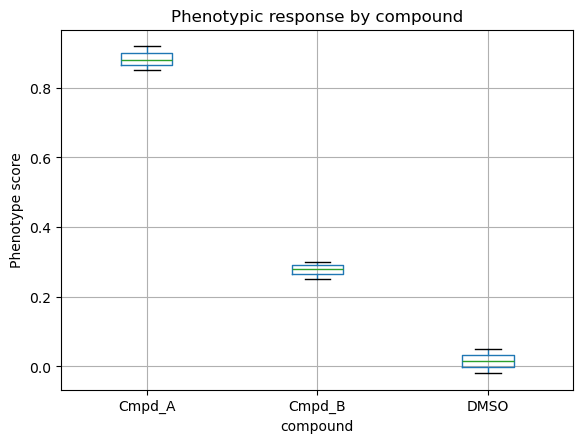

In [18]:
df.boxplot(column="phenotype_score", by="compound")
plt.title("Phenotypic response by compound")
plt.suptitle("")
plt.ylabel("Phenotype score")
plt.show()

- Which compound looks most promising?
  - compound A
- Is the effect strong, consistent, or both?
  - strong
- Would you move it forward?
  - Yes
- What experiment would you do next to de-risk it?
  - run a replicate study 

In [19]:
df.groupby("compound")["phenotype_score"].mean()

compound
Cmpd_A    0.883333
Cmpd_B    0.276667
DMSO      0.015000
Name: phenotype_score, dtype: float64

In [20]:
df.groupby("compound")["phenotype_score"].agg(["mean", "std", "count"])

,mean,std,count
compound,,,
Cmpd_A,0.883333,0.035119,3
Cmpd_B,0.276667,0.025166,3
DMSO,0.015000,0.049497,2


### Translational interpretation 

Compound A would be prioritized for follow-up based on its higher phenotype score and apparent reproducibility across replicates. Next steps would include confirming the effect across additional doses and batches, followed by testing in a more disease-relevant system to assess translational potential. 

## Day 1A - Practice: Exploring CSV Files with pandas

In [22]:
import pandas as pd
df=pd.read_csv("data/example_screen.csv")

In [24]:
df.head()
df.shape
df.columns
df.dtypes

compound            object
dose                 int64
phenotype_score    float64
batch                int64
dtype: object

In [28]:
df["compound"].unique()

array(['DMSO', 'Cmpd_A', 'Cmpd_B'], dtype=object)

In [29]:
df["batch"].unique()

array([1, 2])

## Day 1A - Practice: CSV Exploration and Fluency

In [30]:
df.tail()

,compound,dose,phenotype_score,batch
3,Cmpd_A,1,0.92,1
4,Cmpd_B,1,0.30,1
5,Cmpd_B,1,0.28,1
6,Cmpd_A,1,0.88,2
7,Cmpd_B,1,0.25,2


In [31]:
df.sample(3)

,compound,dose,phenotype_score,batch
3,Cmpd_A,1,0.92,1
1,DMSO,0,-0.02,1
0,DMSO,0,0.05,1


In [32]:
df["compound"].value_counts()

compound
Cmpd_A    3
Cmpd_B    3
DMSO      2
Name: count, dtype: int64

In [36]:
df.groupby(["compound", "batch"]).size()

compound  batch
Cmpd_A    1        2
          2        1
Cmpd_B    1        2
          2        1
DMSO      1        2
dtype: int64

In [37]:
df[df["compound"] == "Cmpd_A"]

,compound,dose,phenotype_score,batch
2,Cmpd_A,1,0.85,1
3,Cmpd_A,1,0.92,1
6,Cmpd_A,1,0.88,2


In [39]:
df[(df["compound"] == "Cmpd_A") & (df["batch"] == 1)]

,compound,dose,phenotype_score,batch
2,Cmpd_A,1,0.85,1
3,Cmpd_A,1,0.92,1


In [40]:
df.sort_values("phenotype_score", ascending = False)

,compound,dose,phenotype_score,batch
3,Cmpd_A,1,0.92,1
6,Cmpd_A,1,0.88,2
2,Cmpd_A,1,0.85,1
4,Cmpd_B,1,0.30,1
5,Cmpd_B,1,0.28,1
7,Cmpd_B,1,0.25,2
0,DMSO,0,0.05,1
1,DMSO,0,-0.02,1


In [41]:
df["is_control"] = df["compound"] == "DMSO"
df

,compound,dose,phenotype_score,batch,is_control
0,DMSO,0,0.05,1,True
1,DMSO,0,-0.02,1,True
2,Cmpd_A,1,0.85,1,False
3,Cmpd_A,1,0.92,1,False
4,Cmpd_B,1,0.30,1,False
5,Cmpd_B,1,0.28,1,False
6,Cmpd_A,1,0.88,2,False
7,Cmpd_B,1,0.25,2,False


In [42]:
df.groupby("is_control")["phenotype_score"].mean()

is_control
False    0.580
True     0.015
Name: phenotype_score, dtype: float64

In [44]:
df.shape

(8, 5)

In [46]:
df.columns

Index(['compound', 'dose', 'phenotype_score', 'batch', 'is_control'], dtype='object')

In [47]:
df["compound"].unique()

array(['DMSO', 'Cmpd_A', 'Cmpd_B'], dtype=object)

In [49]:
df.groupby("compound")["phenotype_score"].mean()

compound
Cmpd_A    0.883333
Cmpd_B    0.276667
DMSO      0.015000
Name: phenotype_score, dtype: float64

In [56]:
import pandas as pd
df = pd.read_csv("data/example_screen_messy.csv")

In [57]:
df.head()

,compound,dose,phenotype_score,batch
0,DMSO,0.0,0.02,1
1,DMSO,0.0,NaN,1
2,DMSO,0.0,-0.01,2
3,Cmpd_A,0.5,0.40,1
4,Cmpd_A,1.0,0.82,1


In [58]:
df.groupby("compound")["phenotype_score"].mean()

compound
Cmpd_A    0.752500
Cmpd_B    0.243333
Cmpd_C    0.145000
DMSO      0.005000
Name: phenotype_score, dtype: float64

In [63]:
df_no_missing = df[df["phenotype_score"].notna()] 
df_no_missing

,compound,dose,phenotype_score,batch
0,DMSO,0.0,0.02,1
2,DMSO,0.0,-0.01,2
3,Cmpd_A,0.5,0.40,1
4,Cmpd_A,1.0,0.82,1
5,Cmpd_A,1.0,0.88,2
6,Cmpd_A,2.0,0.91,2
7,Cmpd_B,0.5,0.10,1
8,Cmpd_B,1.0,0.28,1
10,Cmpd_B,2.0,0.35,2
11,Cmpd_C,1.0,0.15,1


In [64]:
df_no_missing.shape

(11, 4)

In [66]:
df_no_missing.groupby(["compound", "dose"])["phenotype_score"].agg(["mean", "std", "count"]) 

mean       std  count
compound dose                        
Cmpd_A   0.5   0.400       NaN      1
         1.0   0.850  0.042426      2
         2.0   0.910       NaN      1
Cmpd_B   0.5   0.100       NaN      1
         1.0   0.280       NaN      1
         2.0   0.350       NaN      1
Cmpd_C   1.0   0.145  0.007071      2
DMSO     0.0   0.005  0.021213      2

In [73]:
df_no_missing[df_no_missing["compound"] == "DMSO"]["phenotype_score"].mean()


np.float64(0.005)

In [77]:
control_mean=df_no_missing[df_no_missing["compound"] =="DMSO"]["phenotype_score"].mean()

In [78]:
df_no_missing.groupby(["compound", "dose"])["phenotype_score"].mean() - control_mean

compound  dose
Cmpd_A    0.5     0.395
          1.0     0.845
          2.0     0.905
Cmpd_B    0.5     0.095
          1.0     0.275
          2.0     0.345
Cmpd_C    1.0     0.140
DMSO      0.0     0.000
Name: phenotype_score, dtype: float64

### Final decision - Messy CSV challenge

**Decision:**
Compound A at dose 2 would be prioritized for follow-up. 

**Rationale:**
Compound A shows the strongest phenotype relative to DMS with an apparent dose-dependent trend, exceeding the effects observed for other compounds.

**Concern/ Next Step:**
The effect at dose 2 is supported by only a single data point, so reproducibility would need to be confirmed across additional replicates or batches before committing further resources. 